# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2025
## Lab 6: Gordus 
## March 014, 2025

#  Atomic Distances from a PDB file

For this lab, you will be calculating bond distances and angles from the file 1u70.pdb which contains the structure coordinates for the enzyme dihydrofolate reductase from mouse (mDHFR), bound to the inhibitor methotrexate (MTX), which is used in cancer chemotherapy.

PDB files can be opened with a text editor, and have all sorts of useful metadata which you can read directly by opening the file in a text editor, or by extracting with some conveniently written libraries.

**For this lab, you will need to pip install two libraries:**

BioPython: This library has all sorts of useful functions that are commonly used in bio and bioinformatics research.

`pip install biopython` or
`conda install biopython`

RamachanDraw: This library conveniently extracts psi & phi angles from PDB files, and produces Ramachandran plots

`pip install RamachanDraw`

For `conda` users,
- install `pip` in your environment (`conda install pip`)
- activate env
- use `pip install RamachanDraw` inside env

In [ ]:
# These are the libraries you will need for this lab

import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import stats
from ramachandraw.utils import fetch_pdb, plot
from ramachandraw.parser import get_phi_psi
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser(PERMISSIVE=1)


# Function: extract_coords:

This is a function I wrote to make extracting coordinate data easier on you. It produces dictionaries of atomic coordinates for the protein residues (aa_res) and MTX residues (mtx_res).

aa_res has 4 keys: 'name','C','N','O'

Each atom is a list of that atom type. The list as follows:

['Atom Type',coordinate vector]

For Carbon (C), the order of the carbons is:

C-alpha (CA), C-carboxyl (C), sidechain C's

For Nitrogen (N), the order of nitrogens is:

N-amide (N), sidechain N's

For Oxygen, the order is:

O-carboxyl (O), sidechain O's

For example, if I wanted the name of sixth amino acid, I would type:

`aa_res[5]['name']`

(Remember, we start counting at 0).

This should return 'CYS'.

If I want the coordinates for the alpha-Carbon for this residue:

`aa_res[5]['C'][0][1]`

If I want the id of this carbon:

`aa_res[5]['C'][0][0]`

For MTX, there are no amino acides, so the keys for mtx_res are: 'C','N','O'

The entire MTX dictionary is essentially treated like one amino acid. So if you want the carbon ID for 4th carbon, you would type:

`mtx_res['C'][3][0]`

If you wanted the coordinates for that carbon, it would be:

`mtx_res['C'][3][1]`

In [ ]:
def extract_coords(pdb_object):
    model1 = pdb_object[0]

    chain_A = model1['A']

    aa_res = {}
    mtx_res = {}


    for residue in chain_A:
        residue_id = residue.id
        # Only AA residues
        if  bool(re.search(' ',residue_id[0])):
            if residue_id[1] == 5:
                res_temp = residue
            aa_res[residue_id[1]-1] = {}
            aa_res[residue_id[1]-1]['name'] = residue.resname
            aa_res[residue_id[1]-1]['C'] = []
            aa_res[residue_id[1]-1]['N'] = []
            aa_res[residue_id[1]-1]['O'] = []
            
            for atom in residue:
                if bool(re.search('C',atom.name)):
                    aa_res[residue_id[1]-1]['C'].append([atom.name,atom.coord])
                if bool(re.search('N',atom.name)):
                    aa_res[residue_id[1]-1]['N'].append([atom.name,atom.coord])
                if bool(re.search('O',atom.name)):
                    aa_res[residue_id[1]-1]['O'].append([atom.name,atom.coord])
                    
        # Only MTX residues
        elif bool(re.search('H_MTX',residue_id[0])):
            mtx_res['C'] = []
            mtx_res['N'] = []
            mtx_res['O'] = []
            for atom in residue:
                if bool(re.search('C',atom.name)):
                    mtx_res['C'].append([atom.name,atom.coord])
                if bool(re.search('N',atom.name)):
                    mtx_res['N'].append([atom.name,atom.coord])
                if bool(re.search('O',atom.name)):
                    mtx_res['O'].append([atom.name,atom.coord])
                    
    return aa_res, mtx_res




# Function: dihedral angle

<img src="http://www.gordus.org/public_images/dihedral2.png" alt="Drawing" style="width: 250px;"/>
This function calculates a dihedral angle (omega) when given four atomic coordinates (v1, v2, v3, & v4). This calculation requires knowing linear algebra, which I don't expect you to know. For those of you who are interested, I am calculating the angle betweent the norms of the b1,b2 plane, and the b2,b3 plane. If you would like this explained in more detail, please come by my office.

For this exercise, all you need to know are the correct identities of v1, v2, v3 and v4 to use this function properly.

In [ ]:
def dihedral(v1,v2,v3,v4):
    b1 = v2 - v1
    b2 = v3 - v2
    b3 = v4 - v3
    
    m = np.cross(b2,b1) / np.linalg.norm(np.cross(b2,b1))
    n = np.cross(b3,b2) / np.linalg.norm(np.cross(b3,b2))
    

    return np.arccos(np.dot(m,n))

# <font color='red'>Student Input Cell: 2 points</font>   

In [ ]:
# Make path and filename for '1u70.pdb' so you can import it in the next cell.

file_path = "/Users/cmdb/Documents/GitHub/qblab2/week6/"
filename  = "1u70.pdb"



In [ ]:
# Import PDB coordinates

PDB_id = '1u70'

pdb_s = parser.get_structure(PDB_id, file_path+filename)

aa_res, mtx_res = extract_coords(pdb_s)



# 1.a Calculate Bond Lengths

The polypeptide backbone contains two nitrogen carbon bonds: one is the peptide bond (C–N), the other one links the peptide bond nitrogen and the C-alpha atom (N–Calpha).

Calculate the mean of the bond lengths for all C–N and N–C-alpha in mDHFR. Report the mean values, and the mean difference.


*NOTE: There will be one less peptide bond than N-Calpha bond. Why do you think this is?*

# <font color='red'>Student Input Cell: 5 points</font>   

In [ ]:
# Compare the length of a C-N and the N-C_alpha bond in a protein
# Make an array of C-N lengths and N-C_alpha lengths
# Print the mean C-N and mean N-C_alpha bonds, as well as their difference
def distance_calc(pos1,pos2):
    return np.sqrt((pos2[0]-pos1[0])**2+(pos2[1]-pos1[1])**2+(pos2[2]-pos1[2])**2)


CNBond = distance_calc(aa_res[0]['C'][1][1],aa_res[1]['N'][0][1])
NCABond = distance_calc(aa_res[0]['C'][0][1],aa_res[0]['N'][0][1])
print(f"The length of a C-N bond is {CNBond}")
print(f"The length of a N-C_alpha bond is {NCABond}")

CNlengths = np.array([distance_calc(aa_res[residue]['C'][1][1],aa_res[residue+1]['N'][0][1]) for residue in range(len(aa_res)-1)])
CNmean = np.mean(CNlengths)
print(f"The mean C-N bond length is {CNmean}")
NCAlengths = np.array([distance_calc(aa_res[residue]['C'][0][1],aa_res[residue]['N'][0][1]) for residue in aa_res])
NCAmean = np.mean(NCAlengths)
print(f"The mean N-C_alpha bond length is {NCAmean}")
print(f"The mean difference between C-N bond length and N-C_alpha bond length is {NCAmean-CNmean}")

The length of a C-N bond is 1.3327836990356445
The length of a N-C_alpha bond is 1.4895484447479248
The mean C-N bond length is 1.330033779144287
The mean N-C_alpha bond length is 1.4581782817840576
The mean difference between C-N bond length and N-C_alpha bond length is 0.1281445026397705


# 1.b Calculate p-value

Use `stats.ttest_ind()`. For reference, check:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html


# <font color='red'>Student Input Cell: 2 points</font>   

In [ ]:
print(f"The p-value for the two bond types to not have the same average distance is {stats.ttest_ind(NCAlengths,CNlengths)[1]}")

The p-value for the two bond types to not have the same average distance is 0.0


# 1.c Histogram

Represent the bond lengths in two histograms to visualize their distributions. You can use `hist(data),label = 'name')`

# <font color='red'>Student Input Cell: 5 points</font>   

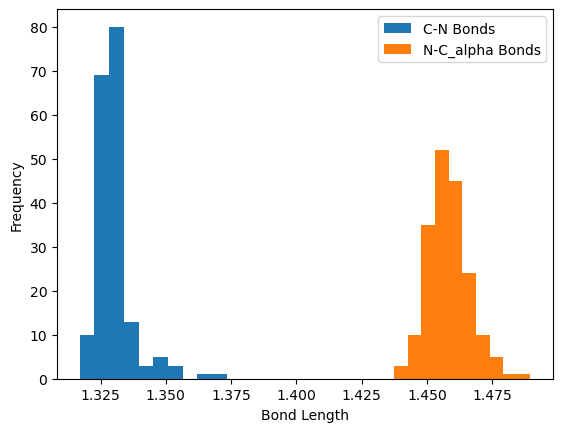

In [ ]:
# Plot Histogram of Bond Distances
plt.hist(CNlengths,label="C-N Bonds")
plt.hist(NCAlengths,label="N-C_alpha Bonds")
plt.ylabel("Frequency")
plt.xlabel("Bond Length")
plt.legend()
plt.show()


# 1.d Explanation

What could explain the observed difference in the mean bond lengths? Use the chemical structure of a polypeptide to explain the observation. 


# <font color='red'>Student Input Cell: 5 points</font>   

The N-C_alpha bond is likely longer as a result of steric hindrance from the side chain present on C_alpha

# 2. Ligand-binding interactions.

# 2.a Hydrogen Bond identification.

From the coordinates in the structure, calculate how many hydrogen bonds between N and O atoms are formed between mDHFR and MTX, and list the residues (identity and position) in mDHFR & MTX that contribute, along with their distances from each other. Make sure you look for N and O atoms from both molecules! The radii for N & O are 1.5 and 1.6 Å, respectively, so a hydrogen bond will bring them closer together.


# <font color='red'>Student Input Cell: 10 points</font>   

In [ ]:
# Find N-O Hydrogen Bonds between MTX and mDHFR. Print the amino acid identities,
# the residues involved in the H-bond, and the distance of the bond.
def find_h_bonds(residue_set,residue_set2):
    h_bonds = []
    for residue in range(len(residue_set)):
        for nitrogen in residue_set[residue]['N']:
            for oxygen in residue_set2['O']:
                bond_length = distance_calc(nitrogen[1],oxygen[1])
                if bond_length <= 3.1:
                    h_bonds.append((residue_set[residue]['name'],residue,oxygen[0],bond_length))
        for oxygen in residue_set[residue]['O']:
            for nitrogen in residue_set2['N']:
                bond_length = distance_calc(nitrogen[1],oxygen[1])
                if bond_length <= 3.1:
                    h_bonds.append((residue_set[residue]['name'],residue,nitrogen[0],bond_length))
    return h_bonds

h_bonds = find_h_bonds(aa_res,mtx_res)
for h_bond in h_bonds:
    print(h_bond)

('ILE', 6, 'NA4', np.float32(2.5423088))
('GLU', 29, 'NA2', np.float32(2.781488))
('GLU', 29, 'N1', np.float32(2.895765))
('ASN', 63, 'O', np.float32(2.8164108))
('LYS', 67, 'O2', np.float32(2.7218347))
('ARG', 69, 'O1', np.float32(3.0113833))
('ARG', 69, 'O2', np.float32(2.8708582))
('VAL', 114, 'NA4', np.float32(2.6931956))


# 2.b Residue interactions.

At least one of the amino acid residues involved in forming an H-bond with MTX has an apolar side chain. Which amino acids that you identified have apolar side chains? Can any of them form hydrogen bonds with MTX? If so, how so?


# <font color='red'>Student Input Cell: 5 points</font>   

ILE and VAL both lack polar or charged side chains, but the oxygens of their carbonyls could potentially form hydrogen bonds with MTX.


# 3. Analyze bond angles


# 3a. Generate a Ramachandran plot.

To make life easier, I've had you pip install a library that does these calculations for you. Run the code below, and answer the HW questions.

<Axes: title={'center': '.pdb/pdb1u70.ent'}, xlabel='φ', ylabel='ψ'>

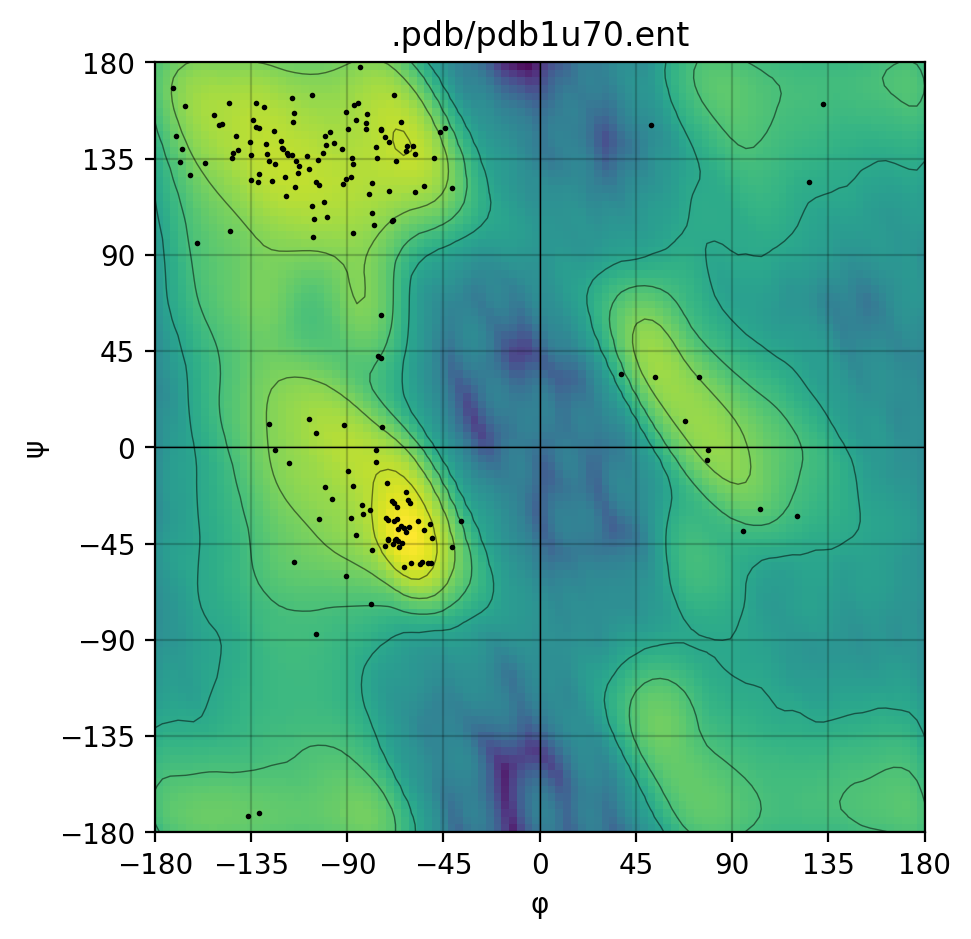

In [ ]:
# Drawing the Ramachandran plot
plot(fetch_pdb(PDB_id))

# Generating a dictionary to store the phi and psi angles

#phi_psi_dict = phi_psi(fetch(PDB_id), return_ignored=False)


# 3b. Interpret Ramachandran Plot.

Based on your Ramachandran plot, does this protein have beta sheets, alpha helices, or both? What sort of structures are the residues in the "forbidden" zone likely participating in?

# <font color='red'>Student Input Cell: 5 points</font>   

Beta sheets and alpha helices, with some of the alpha helices being left-handed

# 3.c Calculate and Plot Omega Angles

For this question, you will need to use the dihedral function I provided up above. You will need to use the right residues in your calculation. Plot the resulting angles you calculate.

# <font color='red'>Student Input Cell: 5 points</font>   

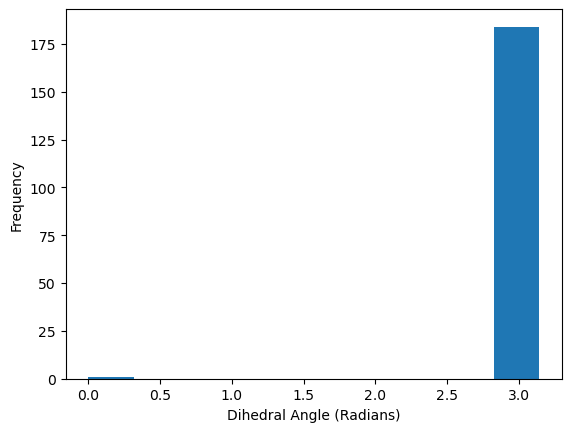

In [ ]:
#Calculate omega angles
omega_angles = np.array([dihedral(aa_res[residue]['C'][0][1],aa_res[residue]['C'][1][1],aa_res[residue+1]['N'][0][1],aa_res[residue+1]['C'][0][1]) for residue in range(len(aa_res)-1)])

plt.hist(omega_angles)
plt.ylabel("Frequency")
plt.xlabel("Dihedral Angle (Radians)")
plt.show()

# 3.d Interpret Omega Angles

How many cis peptide bonds does the structure contain? Explain your reasoning.

# <font color='red'>Student Input Cell: 5 points</font>   

In [ ]:
print(f"There is {len(omega_angles[omega_angles < 1])} cis peptide bond with a dihedral angle of approximately 0")

There is 1 cis peptide bond with a dihedral angle of approximately 0


# 4. AlphaFold

You have two pdb files named `2kdl1.pdb` and `2kdm1.pdb`. The sequences for each peptide are the following:

### 2kdl1

`TTYKLILNLKQAKEEAIKELVDAGTAEKYIKLIANAKTVEGVWTLKDEIKTFTVTE`

### 2kdm1

`TTYKLILNLKQAKEEAIKEAVDAGTAEKYFKLIANAKTVEGVWTYKDEIKTFTVTE`

These two peptides differ by 3 residues.

Use this Colab Notebook to predict the structures:

https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb


Download PyMol here:

https://nam02.safelinks.protection.outlook.com/?url=https%3A%2F%2Fpymol.org%2Fep&data=05%7C02%7Cagordus%40jhu.edu%7Ceda95088e5ea44dca8c508dc399d47fe%7C9fa4f438b1e6473b803f86f8aedf0dec%7C0%7C0%7C638448594888572284%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C0%7C%7C%7C&sdata=zdtpXmfmNSjeYBQKby4moPulGmFygQOgTkY7j7bWE7o%3D&reserved=0

USERNAME: jun2021

PASSWORD: betabarrel

Make sure to install PyMol AND save the license file. Use PyMol to open the two pdb files. Compare these to what AlphaFold predicted. Do they match? How are the two structures the same or different?

# <font color='red'>Student Input Cell: 5 points</font>   

For 2kdl1, both the Alphafold structure and the pdb viewed through pymol display three alpha helices.
For 2kdm1, the AlphaFold structure lacks the turns between the strands of the beta sheet.